In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("world2.csv")

In [3]:
# get the useful rows, the data report sometime gives redundant rows
data = data.iloc[0:5866,:]

In [4]:
data.columns

Index(['who', 'color', 'heading', 'xcor', 'ycor', 'shape', 'label',
       'label-color', 'breed', 'hidden?', 'size', 'pen-size', 'pen-mode',
       'latitude', 'longitude', 'elevation', 'stories', 'basement',
       'total_market_value', 'structure_value', 'sq.ft.', 'inundation_10y',
       'inundation_100y', 'cost_to_personal_property_10y',
       'cost_to_personal_property_100y', 'future_loss', 'future_benefit',
       'damage_pct_10y', 'damage_pct_100y', 'moved?', 'mot_year', 'ori_moved?',
       'ori_year'],
      dtype='object')

In [5]:
# drop the unnecessay columns
data = data.drop(["color"],axis = 1)
data = data.drop(["heading"],axis = 1)
data = data.drop(["shape"],axis = 1)
data = data.drop(["label"],axis = 1)
data = data.drop(["label-color"],axis = 1)
data = data.drop(["hidden?"],axis = 1)
data = data.drop(["size"],axis = 1)
data = data.drop(["pen-size"],axis = 1)
data = data.drop(["pen-mode"],axis = 1)
data = data.drop(["future_loss"],axis = 1)
data = data.drop(["future_benefit"],axis = 1)
data = data.drop(["moved?"],axis = 1)
data = data.drop(["ori_moved?"],axis = 1)

# add the difference between original year and motivated year

data["delta_year"] = data["ori_year"] - data["mot_year"]
data["motivated"] = data["delta_year"] > 0

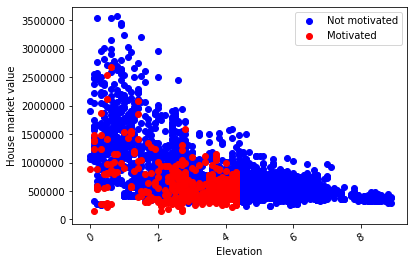

In [6]:
# draw the scatter plot to show the motivated and not motivated
fig = plt.figure(1,figsize=(6,4))
colors = ['b','r']
Label_Com = ['Not motivated','Motivated']
for index in range(2):
    Market_value = data.loc[data['motivated'] == index]['total_market_value']
    Elevation = data.loc[data['motivated'] == index]['elevation']
    plt.scatter(Elevation,Market_value, c=colors[index])
    
ax = fig.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
plt.xlabel('Elevation')
plt.ylabel('House market value')
#added this to get the legend to work
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = Label_Com, loc='upper right')

plt.show()

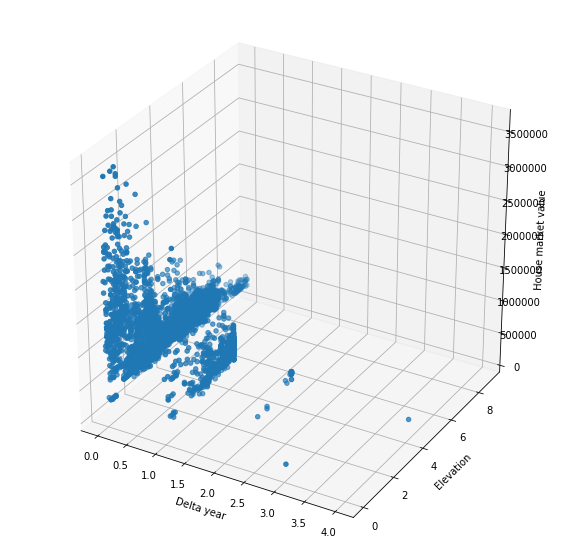

In [25]:
# draw a 3D plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1,figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data["delta_year"],data["elevation"] ,data["total_market_value"])
 
ax.set_xlabel('Delta year')
ax.set_ylabel('Elevation')
ax.set_zlabel('House market value')
 
plt.show()